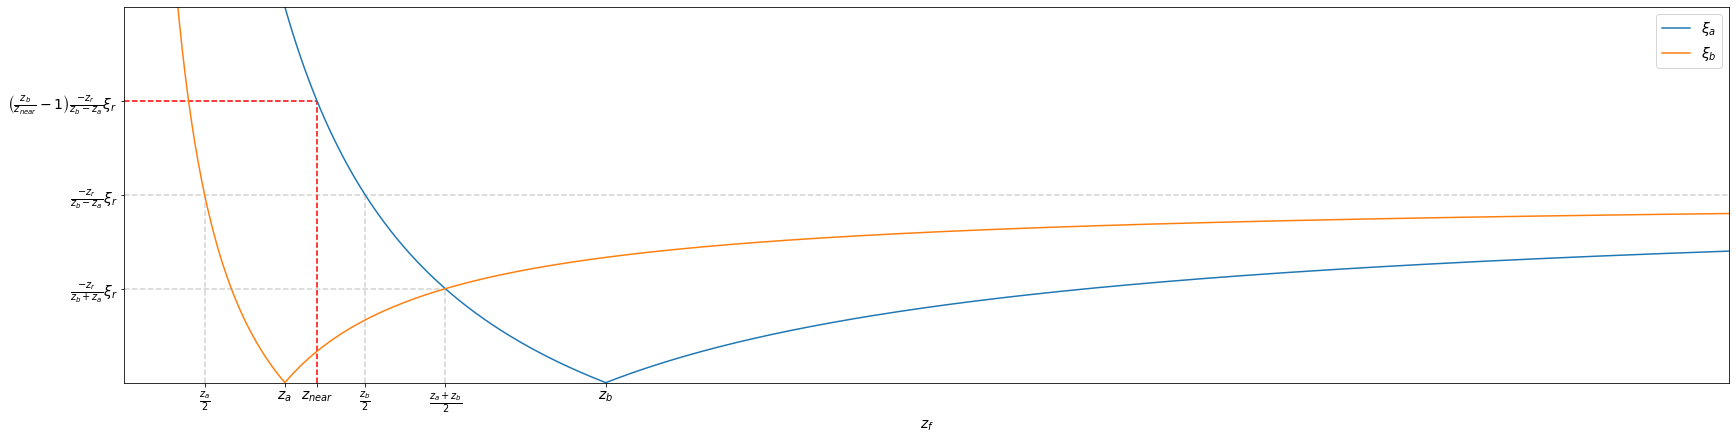

In [1]:
import numpy as np
from matplotlib import pyplot

z_r = -17.0
z_a = 10.0
z_b = 30.0

z_near = 12.0

asymptote = z_r / (z_a - z_b)

opt_z = (z_a + z_b)/2
opt_xi = -z_r/(z_a + z_b)

z_f = np.linspace(0.1, 100.0, num=1000)
xi_a = np.abs(1 - z_b * np.reciprocal(z_f)) * asymptote
xi_b = np.abs(1 - z_a * np.reciprocal(z_f)) * asymptote

xi_b_near = (z_b/z_near - 1) * asymptote


fig, ax = pyplot.subplots(constrained_layout=True, figsize=(24, 6))

ax.set_xlabel(r'$z_f$', fontsize=14)
ax.set_xticks([z_a/2, z_a, z_near, z_b/2, opt_z, z_b])
ax.set_yticks([opt_xi, asymptote, xi_b_near])
ax.set_xticklabels([r'$\frac{z_a}{2}$', r'$z_a$', r'$z_{near}$', r'$\frac{z_b}{2}$', r'$\frac{z_a + z_b}{2}$', r'$z_b$'], fontsize=14)
ax.set_yticklabels([r'$\frac{-z_r}{z_b + z_a} \xi_r$', r'$\frac{-z_r}{z_b - z_a} \xi_r$', r'$\left( \frac{z_b}{z_{near}} - 1 \right) \frac{-z_r}{z_b - z_a} \xi_r$'], fontsize=14)
ax.set_xlim(0.0, 100.0)
ax.set_ylim(0.0, 2 * asymptote)

ax.plot(z_f, xi_a, label=r'$\xi_a$')
ax.plot(z_f, xi_b, label=r'$\xi_b$')
ax.hlines(asymptote, 0.0, 100.0, linestyle='dashed', color='lightgrey', zorder=-1)
ax.hlines(opt_xi, 0.0, opt_z, linestyle='dashed', color='lightgrey', zorder=-1)
ax.vlines([z_a/2, z_b/2], 0.0, asymptote, linestyle='dashed', color='lightgrey', zorder=-1)
ax.vlines(opt_z, 0.0, opt_xi, linestyle='dashed', color='lightgrey', zorder=-1)

ax.hlines(xi_b_near, 0.0, z_near, linestyle='dashed', color='red', zorder=-1)
ax.vlines(z_near, 0.0, xi_b_near, linestyle='dashed', color='red', zorder=-1)

ax.legend(fontsize = 14)

pass

The eye frequencies $(\xi_r, \xi_p)$ can be defined from the panel frequencies $(\xi_a, \xi_b)$:
$$ \begin{align*}
    \xi_r &= \frac{z_a}{z_r} \xi_a + \frac{z_b}{z_r} \xi_b && (1)\\
    \xi_p &= \left( 1 - \frac{z_a}{z_f} \right) \xi_a + \left( 1 - \frac{z_b}{z_f} \right) \xi_b && (2)\\
\end{align*} $$

To integrate the signal over the pupil is the same as to evaluate the spectrum at $\xi_p = 0$.
$$ \begin{align*}
    \xi_p = 0 && \implies && \xi_b = -\frac{1 - \frac{z_a}{z_f}}{1 - \frac{z_b}{z_f}} \xi_a && \implies &&
    \xi_r = \frac{z_a}{z_r} \xi_a - \frac{z_b}{z_r} \frac{1 - \frac{z_a}{z_f}}{1 - \frac{z_b}{z_f}} \xi_a = \frac{1}{1 - \frac{z_b}{z_f}} \frac{z_a - z_b}{z_r} \xi_a && (3)\\
\end{align*} $$

We can then describe the minimum panel frequency $\xi_a$ necessary to support a given desired retina frequency $\xi_r$ at a given focus distance $z_f$:
$$ \begin{align*}
    \xi_a = \left| 1 - \frac{z_b}{z_f} \right| \frac{-z_r}{z_b - z_a} \xi_r && (4)\\
\end{align*} $$

Analogously:
$$ \begin{align*}
    \xi_b = \left| 1 - \frac{z_a}{z_f} \right| \frac{-z_r}{z_b - z_a} \xi_r && (5)\\
\end{align*} $$

Lets assume $z_f \in \left( z_\text{near}, \infty \right)$ with $\frac{z_a}{2} < z_\text{near} \leq \frac{z_b}{2}$.
The maximum required frequency $\xi_a$ is bound at $z_f = z_\text{near}$ while the maximum required frequency $\xi_b$ is bound at $z_f = \infty$.
Specifically, those frequencies are:
$$ \begin{align*}
    \xi_a &= \left( \frac{z_b}{z_\text{near}} - 1 \right) \frac{-z_r}{z_b - z_a} \xi_r && (6)\\
    \xi_b &= \frac{-z_r}{z_b - z_a} \xi_r && (7)\\
\end{align*} $$

The further away a panel is, the larger it needs to be to cover the entire observer field of view.
The panel sizes $s_a$ and $s_b$ necessary at a given focus distance $z_f$ are:
$$ \begin{align*}
    s_a = \frac{z_a}{-z_r} s_r + \left| 1 - \frac{z_a}{z_f} \right| s_p && (8)\\
    s_b = \frac{z_b}{-z_r} s_r + \left| 1 - \frac{z_b}{z_f} \right| s_p && (9)\\
\end{align*} $$

Enforcing the same $z_f$ interval $\left( z_\text{near}, \infty \right)$, the maximum required size $s_a$ is bound at $z_f = \infty$ while the maximum required size $s_b$ is bound at $z_f = z_\text{near}$.
Specifically, those sizes are:
$$ \begin{align*}
    s_a &= \frac{z_a}{-z_r} s_r + s_p && (10)\\
    s_b &= \frac{z_b}{-z_r} s_r + \left( \frac{z_b}{z_\text{near}} - 1 \right) s_p && (11)\\
\end{align*} $$

The number of samples on each panel can be defined as $n_a = s_a \xi_a$ and $n_b = s_b \xi_b$. Thererfore we have:
$$ \begin{align*}
    n_a = s_a \xi_a &= \left( \frac{z_a}{-z_r} s_r + s_p \right) \left( \frac{z_b}{z_\text{near}} - 1 \right) \frac{-z_r}{z_b - z_a} \xi_r && (12)\\
    n_b = s_b \xi_b &= \left( \frac{z_b}{-z_r} s_r + \left( \frac{z_b}{z_\text{near}} - 1 \right) s_p \right) \frac{-z_r}{z_b - z_a} \xi_r && (13)\\
\end{align*} $$

The smaller the value of $z_a$ the better. Assuming $z_a = 0$ we have:
$$ \begin{align*}
    n_a &= ( s_p ) \left( \frac{1}{z_\text{near}} - \frac{1}{z_b} \right) (-z_r) \xi_r && (14)\\
    n_b &= \left( \frac{1}{-z_r} s_r + \left( \frac{1}{z_\text{near}} - \frac{1}{z_b} \right) s_p \right) (-z_r) \xi_r && (15)\\
\end{align*} $$

Surprisingly, the smaller the value of $z_b$ the better as well. However, due to $z_\text{near}$ the minimum allowed value is $z_b = 2 z_\text{near}$. Therefore:
$$ \begin{align*}
    n_a &= \frac{-z_r}{2 z_\text{near}} s_p \xi_r && (16)\\
    n_b &= s_r \xi_r + \frac{-z_r}{2 z_\text{near}} s_p \xi_r && (17)\\
\end{align*} $$